<a href="https://colab.research.google.com/github/ds4e/scratchpad/blob/main/nb_20260203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/ds4e/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 106 (delta 36), reused 30 (delta 30), pack-reused 63 (from 1)
Receiving objects: 100% (106/106), 406.89 KiB | 17.69 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Download complete
Extracting data files...
Data extracted


88150.94999999998


,veh id,manufacturer,nameplate,model,CVCM class,EPA class,fleet type,fuel type,footprint,baseline price,baseline mpg,baseline sales,predicted mpg,class
0,1,HONDA,Acura,MDX 4WD,11,SUV,T,G,50.8,45706.20000,22.052700,57380.0,23.011100,SUV
1,2,HONDA,Acura,RDX,11,SUV,T,G,45.1,34588.20000,24.174500,21271.0,26.457747,SUV
2,3,HONDA,Acura,RL,4,MIDSIZE CARS,C,G,47.6,47934.90000,24.562900,5132.0,23.773800,car
3,4,HONDA,Acura,TL,4,MIDSIZE CARS,C,G,47.8,35217.81622,27.068237,56720.0,26.884192,car
4,5,HONDA,Acura,TSX,3,COMPACT CARS,C,G,46.0,29483.10000,29.855173,21996.0,31.871653,car


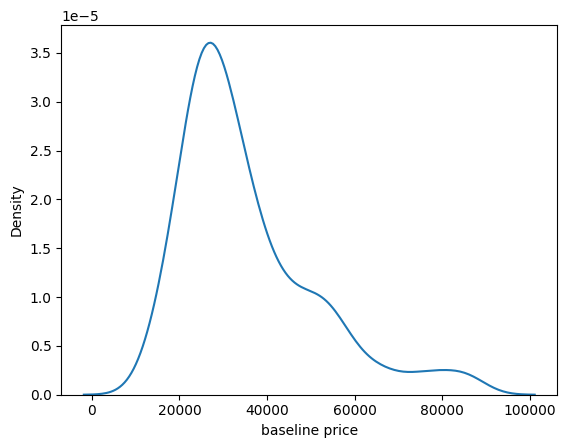

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('./data/cars_env.csv')

# Drop extremely expensive cars:
q90 = np.quantile( df['baseline price'],.9) # Compute the .9 quantile
print(q90)
keep = df['baseline price'] < q90  # Logical condition asserting price < .9 quantile
df = df.loc[keep,:] # Use locator function to filter on a Boolean conditional
df.describe()
sns.kdeplot(data=df,x='baseline price')

# Simplify the vehicle classification scheme:
df['class'] = df['EPA class']
df['class'] = df['class'].replace(['MIDSIZE CARS','COMPACT CARS','SUBCOMPACT CARS','TWO SEATERS','LARGE CARS'],'car')
df['class'] = df['class'].replace(['SMALL STATION WAGONS','MIDSIZE STATION WAGONS'],'station wagon')
df['class'] = df['class'].replace(['STANDARD PICKUP TRUCKS','SMALL PICKUP TRUCKS'],'truck')
df['class'] = df['class'].replace(['VANS','MINIVAN'],'van')

def minmax(x):
    u = (x-min(x))/(max(x)-min(x))
    return u


df.head()

In [38]:
df['class'].value_counts()

,count
class,
car,204
SUV,156
truck,71
station wagon,20
van,20


In [42]:

y = df['class']
X = df.loc[ : , ['footprint', 'baseline price'] ]
U = X.apply(minmax)



In [43]:
model = KNeighborsClassifier(n_neighbors = 5)
model = model.fit(U,y)
y_hat = model.predict(U)


In [44]:
y_hat

array(['SUV', 'car', 'car', 'SUV', 'car', 'SUV', 'car', 'car', 'car',
       'car', 'car', 'car', 'SUV', 'car', 'SUV', 'car', 'car', 'car',
       'SUV', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car',
       'car', 'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'car', 'car', 'SUV',
       'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'car', 'SUV', 'SUV', 'SUV',
       'SUV', 'SUV', 'SUV', 'SUV', 'SUV', 'car', 'car', 'car', 'truck',
       'truck', 'truck', 'truck', 'truck', 'SUV', 'SUV', 'SUV', 'SUV',
       'SUV', 'car', 'car', 'truck', 'truck', 'truck', 'car', 'car',
       'SUV', 'SUV', 'van', 'van', 'van', 'van', 'van', 'SUV', 'SUV',
       'car', 'truck', 'truck', 'truck', 'truck', 'SUV', 'SUV', 'SUV',
       'car', 'car', 'SUV', 'SUV', 'SUV', 'car', 'car', 'car', 'car',
       'car', 'ca

In [45]:
pd.crosstab(y, y_hat)

col_0,SUV,car,station wagon,truck,van
class,,,,,
SUV,129,24,0,3,0
car,33,170,1,0,0
station wagon,6,10,4,0,0
truck,2,6,0,61,2
van,2,0,0,3,15


In [46]:
model.score(U,y)

0.8046709129511678

<Axes: >

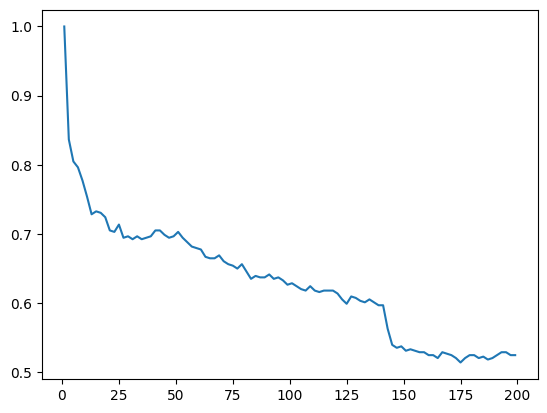

In [47]:
k_grid = [ (2*k+1) for k in range(100) ]

accuracies = []
for k in k_grid:
  model = KNeighborsClassifier(n_neighbors = k )
  model = model.fit(U,y)
  accuracies.append( model.score(U,y) )
sns.lineplot(x= k_grid, y=accuracies )



In [48]:
accuracies

[1.0,
 0.8365180467091295,
 0.8046709129511678,
 0.7961783439490446,
 0.7770700636942676,
 0.7537154989384289,
 0.7282377919320594,
 0.732484076433121,
 0.7303609341825902,
 0.7239915074309978,
 0.7048832271762208,
 0.70276008492569,
 0.7133757961783439,
 0.6942675159235668,
 0.6963906581740976,
 0.692144373673036,
 0.6963906581740976,
 0.692144373673036,
 0.6942675159235668,
 0.6963906581740976,
 0.7048832271762208,
 0.7048832271762208,
 0.6985138004246284,
 0.6942675159235668,
 0.6963906581740976,
 0.70276008492569,
 0.6942675159235668,
 0.6878980891719745,
 0.6815286624203821,
 0.6794055201698513,
 0.6772823779193206,
 0.6666666666666666,
 0.6645435244161358,
 0.6645435244161358,
 0.6687898089171974,
 0.6602972399150743,
 0.6560509554140127,
 0.6539278131634819,
 0.6496815286624203,
 0.6560509554140127,
 0.6454352441613588,
 0.6348195329087049,
 0.6390658174097664,
 0.6369426751592356,
 0.6369426751592356,
 0.6411889596602972,
 0.6348195329087049,
 0.6369426751592356,
 0.63269639065

In [49]:
from sklearn.model_selection import train_test_split

u_train, u_test, y_train, y_test = train_test_split(U,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes



<Axes: >

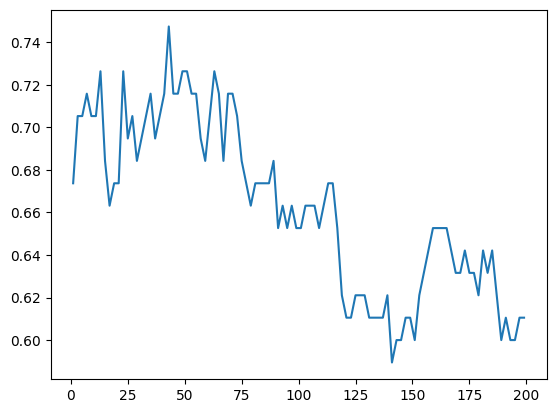

In [50]:
k_grid = [ (2*k+1) for k in range(100) ]
accuracies = []
for k in k_grid:
  model = KNeighborsClassifier(n_neighbors = k )
  model = model.fit(u_train,y_train)
  accuracies.append( model.score(u_test,y_test) )
sns.lineplot(x= k_grid, y=accuracies )

<Axes: xlabel='Neighbors', ylabel='Accuracy'>

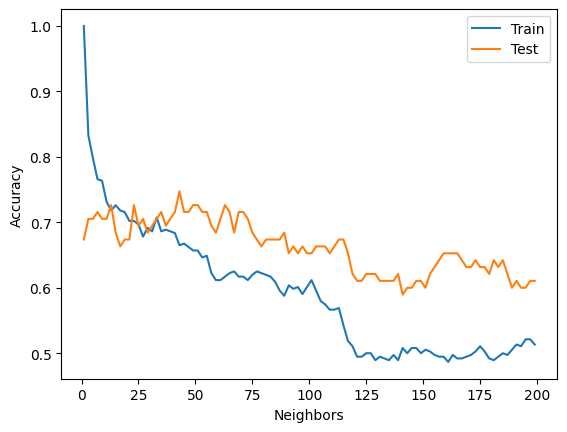

In [53]:
k_grid = [ (2*k+1) for k in range(100) ]

accuracies_test = []
accuracies_train = []
for k in k_grid:
  model = KNeighborsClassifier(n_neighbors = k )
  model = model.fit(u_train,y_train)
  accuracies_test.append( model.score(u_test,y_test) )
  accuracies_train.append( model.score(u_train,y_train) )
sns.lineplot(x= k_grid, y=accuracies_train, label = 'Train' ).set(xlabel='Neighbors', ylabel = 'Accuracy')
sns.lineplot(x= k_grid, y=accuracies_test, label = 'Test' )

/tmp/ipython-input-1915302661.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['baseline price'],


<Axes: xlabel='baseline price', ylabel='baseline sales'>

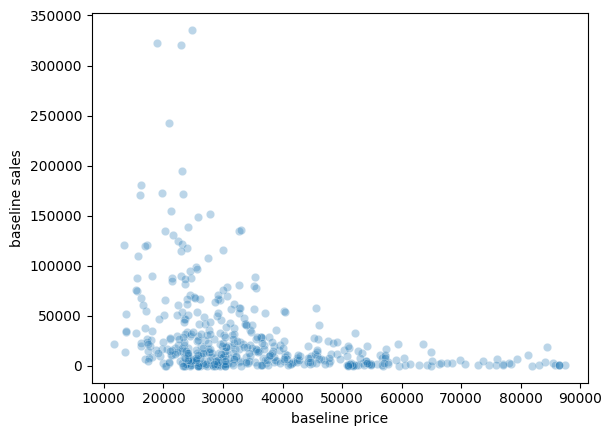

In [54]:
sns.scatterplot(x=df['baseline price'],
                y = df['baseline sales'],
                palette='crest',
                alpha=.3)

/tmp/ipython-input-3307539668.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['baseline mpg'],


<Axes: xlabel='baseline mpg', ylabel='baseline sales'>

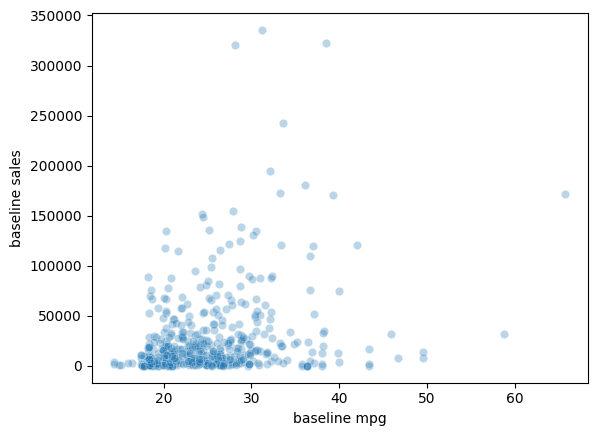

In [55]:
sns.scatterplot(x=df['baseline mpg'],
                y = df['baseline sales'],
                palette='crest',
                alpha=.3)

<Axes: xlabel='baseline mpg', ylabel='baseline price'>

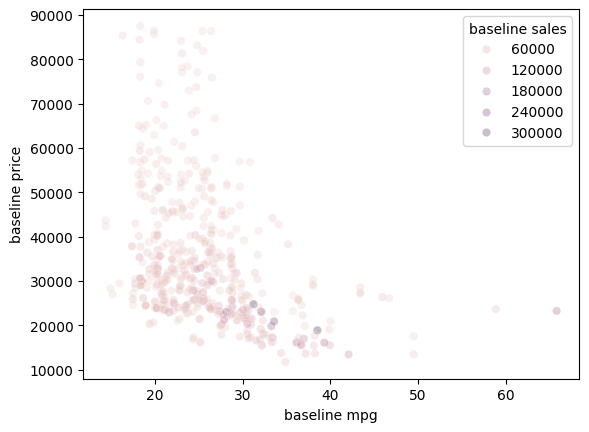

In [60]:
sns.scatterplot(x=df['baseline mpg'],
                y = df['baseline price'],
                hue = df['baseline sales'],
                #palette='crest',
                alpha=.3)